In [22]:
# !pip install pandarallel

In [21]:
from pandarallel import pandarallel
import multiprocessing

num_processors = multiprocessing.cpu_count()
print(f'Available CPUs: {num_processors}')

pandarallel.initialize(nb_workers=num_processors-6, use_memory_fs=False, progress_bar=True)

Available CPUs: 16
INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from helpers.utils import eda_categorical, is_numeric_dtype, multiple_eda_categorical, multiple_eda_continuous
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('data/train.csv')
processed_df = pd.read_csv('data/train_preprocessed.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Response Variable

In [4]:
counts = df.groupby(by='target').count()
total_points = len(df)
counts.head()

,id,keyword,location,text
target,,,,
0,4342,4323,2884,4342
1,3271,3229,2196,3271


<BarContainer object of 2 artists>

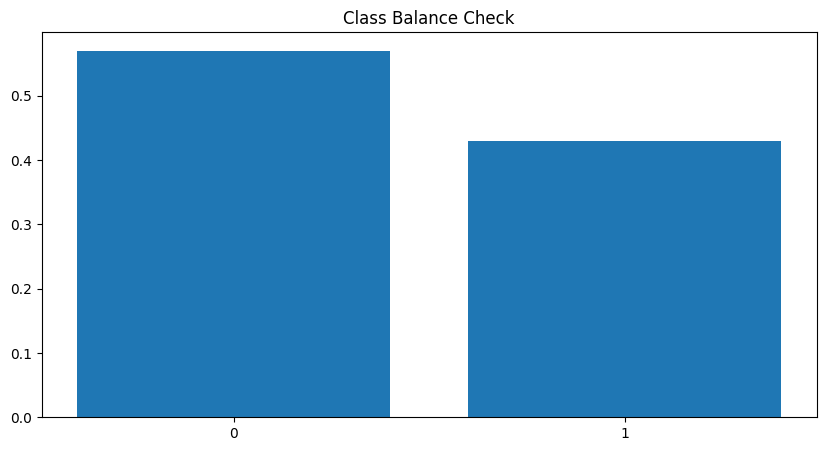

In [5]:
fig = plt.figure(figsize = (10, 5))
plt.title('Class Balance Check')
plt.bar(["0", "1"], counts['id']/total_points)

### There is not a significant class imbalance. The non-disaster tweets are higher in number. 

## Predictors

In [33]:
df['word_count'] = df['text'].parallel_apply(lambda t: len(t.split()))
processed_df['word_count'] = processed_df['text'].parallel_apply(lambda t: len(t.split()))

In [24]:
df.head()

,id,keyword,location,text,target,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16


## Is word count affects the label? 

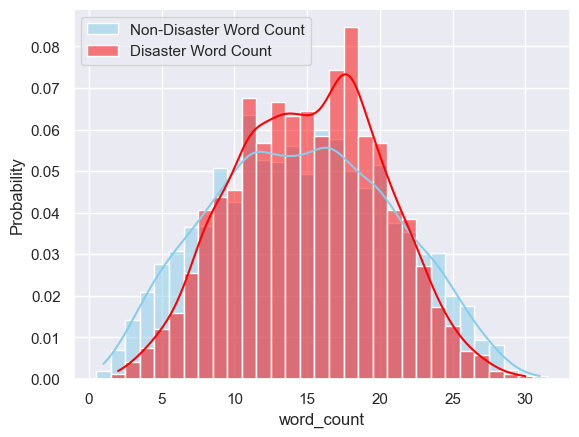

In [31]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

sns.histplot(data=df[df.target==0], x="word_count", color="skyblue", label="Non-Disaster Word Count", 
             kde=True, log_scale=False, discrete=True, stat='probability')
sns.histplot(data=df[df.target==1], x="word_count", color="red", label="Disaster Word Count", 
             kde=True, log_scale=False, discrete=True, stat='probability')

plt.legend() 
plt.show()

### We see that below 10 and above 23 words, the label of the tweet is much more likely to be disaster.

## Did text preprocessing change the shape of the distribution?

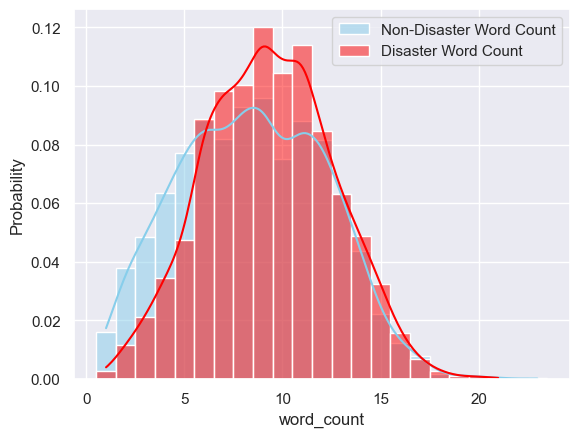

In [34]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

sns.histplot(data=processed_df[processed_df.target==0], x="word_count", color="skyblue", label="Non-Disaster Word Count", 
             kde=True, log_scale=False, discrete=True, stat='probability')
sns.histplot(data=processed_df[processed_df.target==1], x="word_count", color="red", label="Disaster Word Count", 
             kde=True, log_scale=False, discrete=True, stat='probability')

plt.legend() 
plt.show()

### Here, we observe that the distribution of word count by labels changed. By evaluating both of histograms, we can assume that non-disaster tweets include more meaningless words. Thats why, after preprocessing (eliminating non-frequent words) shifted the distribution to far left. 